In [45]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.formula.api import ols
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

In [47]:
energie = pd.read_csv('C:/Users/Oscar Gomez/Desktop/Data Analyst/P9/energie.csv', sep=';', parse_dates=[0], index_col='t')
energie.rename(columns={'Consommation totale': 'cons'}, inplace=True)
energie.dropna(inplace=True)

energie.head(12)

,cons,DJU_ch,DJU_ac
t,,,
2012-01-01,51086.0,336.0,0.0
2012-02-01,54476.0,435.9,0.0
2012-03-01,43156.0,201.9,0.0
2012-04-01,40176.0,230.3,0.0
2012-05-01,35257.0,83.3,30.1
2012-06-01,33219.0,35.0,25.6
2012-07-01,34141.0,12.4,60.4
2012-08-01,32247.0,2.4,117.9
2012-09-01,33269.0,58.0,20.4


In [48]:
energie.describe()

,cons,DJU_ch,DJU_ac
count,114.000000,114.000000,114.000000
mean,39792.359649,173.507018,28.143860
std,7078.931255,140.406232,45.810093
min,30622.000000,0.000000,0.000000
25%,33410.750000,29.200000,0.000000
50%,37424.500000,157.950000,0.950000
75%,44901.750000,293.550000,40.225000
max,57406.000000,467.900000,198.700000


In [49]:
energie['DJU_total'] = energie['DJU_ch'] + energie['DJU_ac']
energie.head()

,cons,DJU_ch,DJU_ac,DJU_total
t,,,,
2012-01-01,51086.0,336.0,0.0,336.0
2012-02-01,54476.0,435.9,0.0,435.9
2012-03-01,43156.0,201.9,0.0,201.9
2012-04-01,40176.0,230.3,0.0,230.3
2012-05-01,35257.0,83.3,30.1,113.4


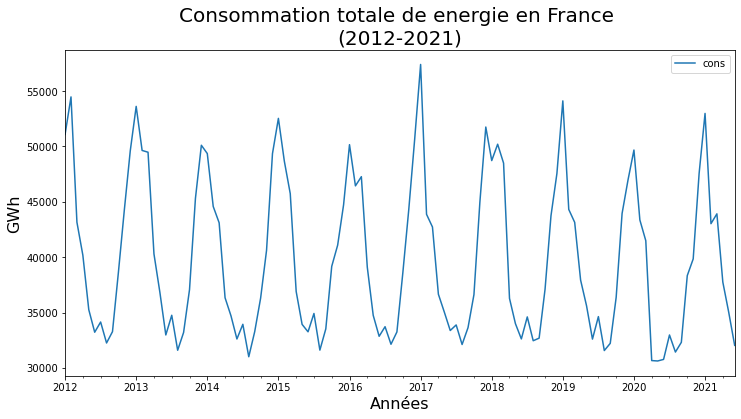

In [50]:
energie.plot(y="cons", figsize=(12,6))

plt.title('Consommation totale de energie en France \n(2012-2021)', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.xlabel('Années', fontsize=16)

plt.savefig('P9_cons.png');

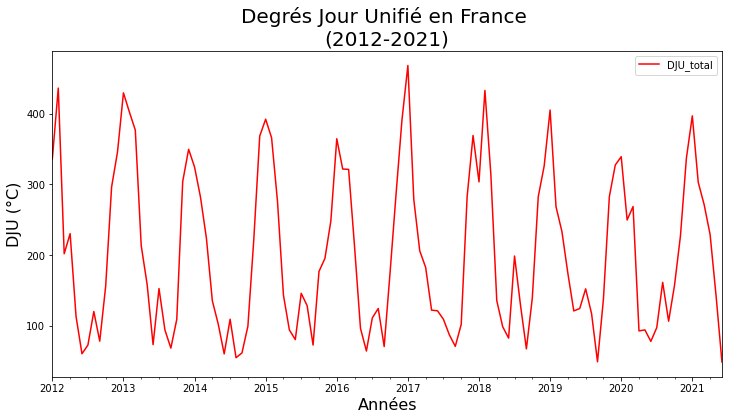

In [51]:
energie.plot(y="DJU_total", figsize=(12,6), color='r')

plt.title('Degrés Jour Unifié en France \n(2012-2021)', fontsize=20)
plt.ylabel('DJU (°C)', fontsize=16)
plt.xlabel('Années', fontsize=16)

plt.savefig('P9_DJU.png');

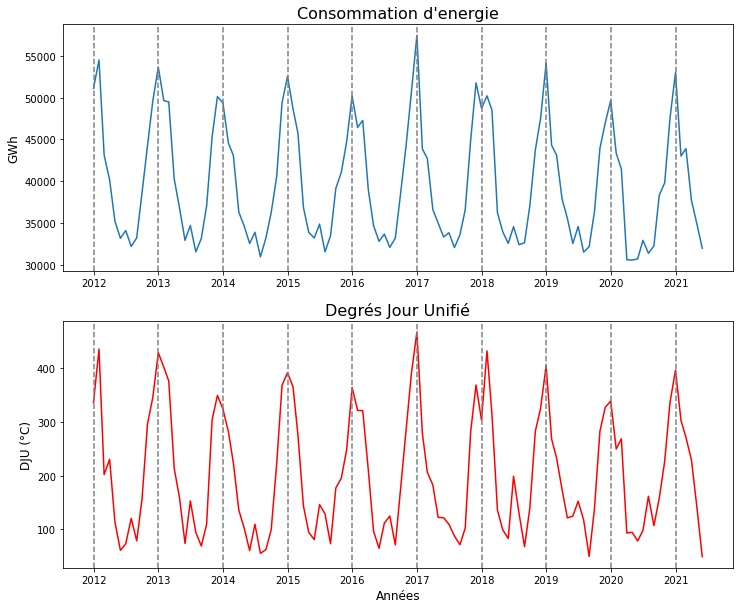

In [52]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.plot(energie.index, energie['cons'])
plt.ylabel('GWh', fontsize=12)
plt.title('Consommation d\'energie', fontsize=16)
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2013'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2014'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2015'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2017'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2018'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2019'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2021'), linestyle='--', color='grey')

plt.subplot(212)
plt.plot(energie.index, energie['DJU_total'], 'r')
plt.ylabel('DJU (°C)', fontsize=12)
plt.xlabel('Années', fontsize=12)
plt.title('Degrés Jour Unifié', fontsize=16)
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2013'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2014'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2015'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2017'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2018'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2019'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2021'), linestyle='--', color='grey')

plt.savefig('P9_cons_DJU')
plt.show()

# Mission 1

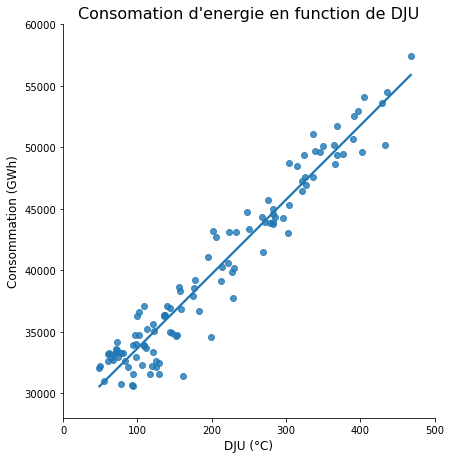

In [53]:
g = sns.lmplot(x='DJU_total', y='cons', data=energie, ci=None, height=6).set(xlim=(0, 500), ylim=(28000, 60000))
plt.title('Consomation d\'energie en function de DJU', fontsize=16)    
plt.ylabel('Consommation (GWh)', fontsize=12)
plt.xlabel('DJU (°C)', fontsize=12)

plt.savefig('P9_reg_cons(DJU)')
plt.show()

In [54]:
reg1 = ols('cons ~ DJU_total', data=energie)

In [55]:
reg_1 = reg1.fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1623.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.74e-68
Time:                        23:49:48   Log-Likelihood:                -1015.6
No. Observations:                 114   AIC:                             2035.
Df Residuals:                     112   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.76e+04    346.659     79.620      0.000    2.69e+04    2.83e+04
DJU_total     60.4574      1.500     40.292      0.000      57.484      63.430
==============================================================================
Omnibus:                        8.938   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.861
Skew:                          -0.666   Prob(JB):                       0.0119
Kurtosis:                       3.303   Cond. No.                         473.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
a = reg_1.params[1]
a

60.45742521413288

In [57]:
energie['cons_RL'] = energie['cons'] - a*energie['DJU_total']
energie.tail()

,cons,DJU_ch,DJU_ac,DJU_total,cons_RL
t,,,,,
2021-02-01,43024.0,302.8,0.0,302.8,24717.491645
2021-03-01,43913.0,271.0,0.2,271.2,27516.946282
2021-04-01,37747.0,228.3,0.9,229.2,23890.158141
2021-05-01,35007.0,138.3,5.1,143.4,26337.405224
2021-06-01,32032.0,1.4,47.6,49.0,29069.586165


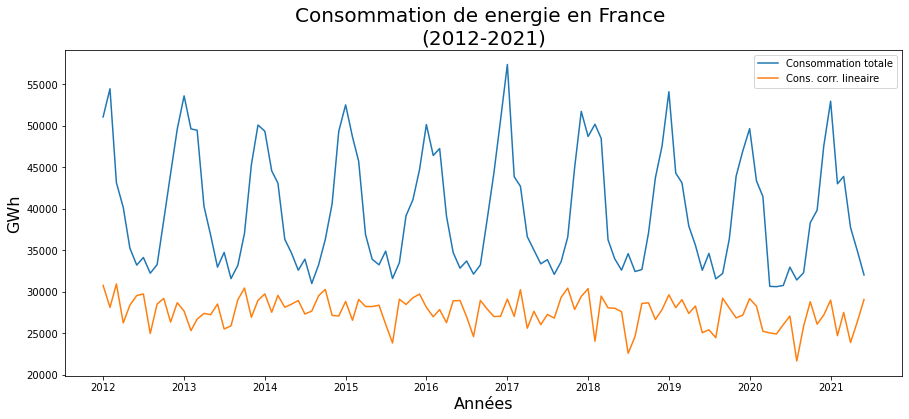

In [58]:
plt.figure(figsize=(15,6))

plt.subplot()
plt.plot(energie.index, energie['cons'], label='Consommation totale')
plt.plot(energie.index, energie['cons_RL'], label='Cons. corr. lineaire')

plt.title('Consommation de energie en France \n(2012-2021)', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper right')

plt.savefig('P9_corr_lin.png');

# Mission 2

In [59]:
decomp_energie = seasonal_decompose(energie['cons_RL'],  model='additive')

In [60]:
obs = pd.DataFrame(energie['cons_RL'])
obs.reset_index(inplace=True)

trend = pd.DataFrame(decomp_energie.trend)
trend.reset_index(inplace=True)

seasonal = pd.DataFrame(decomp_energie.seasonal)
seasonal.reset_index(inplace=True)

resid = pd.DataFrame(decomp_energie.resid)
resid.reset_index(inplace=True)

df1 = pd.merge(obs, seasonal)
df2 = pd.merge(df1, trend)
energie_ma = pd.merge(df2, resid)
energie_ma.set_index('t', inplace=True)

energie_ma.tail(15)

,cons_RL,seasonal,trend,resid
t,,,,
2020-04-01,25041.505198,-542.377797,26314.442162,-730.559167
2020-05-01,24920.864802,161.523603,26314.954009,-1555.612810
2020-06-01,26041.275091,-100.984930,26284.162168,-141.902147
2020-07-01,27075.401042,-1189.794775,26277.298044,1987.897772
2020-08-01,21664.125828,-2659.462775,26121.809358,-1798.220756
2020-09-01,25862.238472,1111.065114,26068.454178,-1317.280820
2020-10-01,28809.955529,1595.695356,26115.056830,1099.203343
2020-11-01,26104.072991,-393.394823,26126.106553,371.361261
2020-12-01,27202.939188,614.250096,26311.308699,277.380393


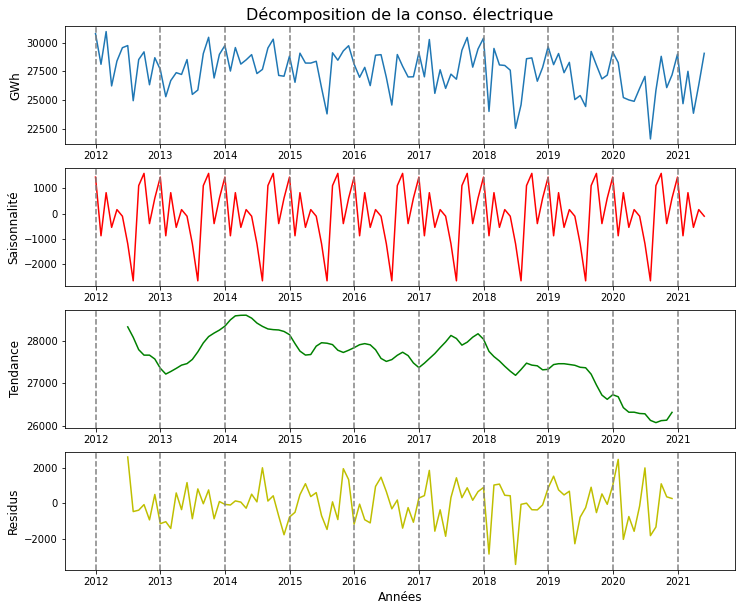

In [61]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(411)
plt.plot(energie_ma.index, energie_ma['cons_RL'])
plt.ylabel('GWh', fontsize=12)
plt.title('Décomposition de la conso. électrique', fontsize=16)
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2013'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2014'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2015'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2017'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2018'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2019'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2021'), linestyle='--', color='grey')

plt.subplot(412)
plt.plot(energie_ma.index, energie_ma['seasonal'], 'r')
plt.ylabel('Saisonnalité', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2013'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2014'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2015'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2017'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2018'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2019'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2021'), linestyle='--', color='grey')

plt.subplot(413)
plt.plot(energie_ma.index, energie_ma['trend'], 'g')
plt.ylabel('Tendance', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2013'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2014'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2015'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2017'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2018'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2019'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2021'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('06/01/2021'), linestyle='--', color='white')

plt.subplot(414)
plt.plot(energie_ma.index, energie_ma['resid'], 'y')
plt.ylabel('Residus', fontsize=12)
plt.xlabel('Années', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2013'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2014'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2015'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2017'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2018'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2019'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2021'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('06/01/2021'), linestyle='--', color='white')

plt.savefig('P9_cons_season')
plt.show()

In [62]:
energie['cons_ma'] = energie['cons_RL'] - energie_ma['seasonal']
energie.head()

,cons,DJU_ch,DJU_ac,DJU_total,cons_RL,cons_ma
t,,,,,,
2012-01-01,51086.0,336.0,0.0,336.0,30772.305128,29324.683198
2012-02-01,54476.0,435.9,0.0,435.9,28122.608349,28998.076087
2012-03-01,43156.0,201.9,0.0,201.9,30949.645849,30118.319112
2012-04-01,40176.0,230.3,0.0,230.3,26252.654973,26795.032770
2012-05-01,35257.0,83.3,30.1,113.4,28401.127981,28239.604378


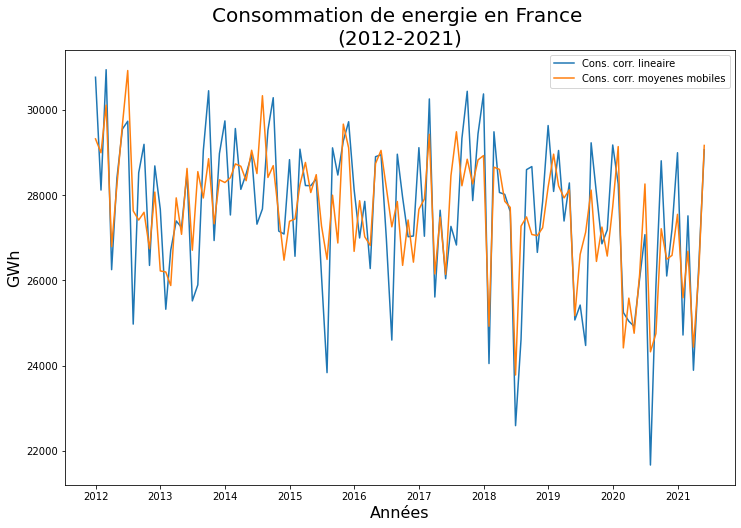

In [63]:
plt.figure(figsize=(12,8))

plt.subplot()
plt.plot(energie.index, energie['cons_RL'], label='Cons. corr. lineaire')
plt.plot(energie.index, energie['cons_ma'], label='Cons. corr. moyenes mobiles')

plt.title('Consommation de energie en France \n(2012-2021)', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper right')

plt.savefig('P9_corr_ma.png');

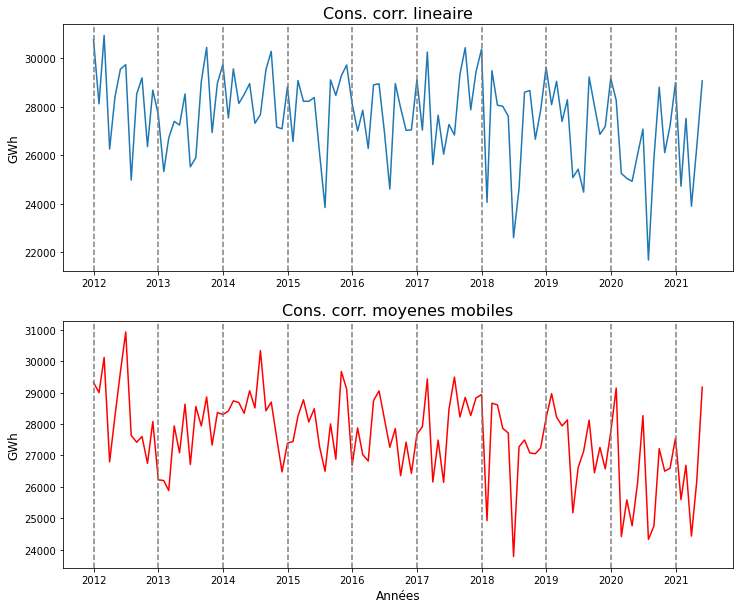

In [64]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.plot(energie.index, energie['cons_RL'])
plt.ylabel('GWh', fontsize=12)
plt.title('Cons. corr. lineaire', fontsize=16)
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2013'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2014'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2015'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2017'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2018'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2019'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2021'), linestyle='--', color='grey')

plt.subplot(212)
plt.plot(energie.index, energie['cons_ma'], 'r')
plt.ylabel('GWh', fontsize=12)
plt.xlabel('Années', fontsize=12)
plt.title('Cons. corr. moyenes mobiles', fontsize=16)
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2013'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2014'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2015'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2017'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2018'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2019'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2021'), linestyle='--', color='grey')

plt.savefig('P9_corr_ma2')
plt.show()

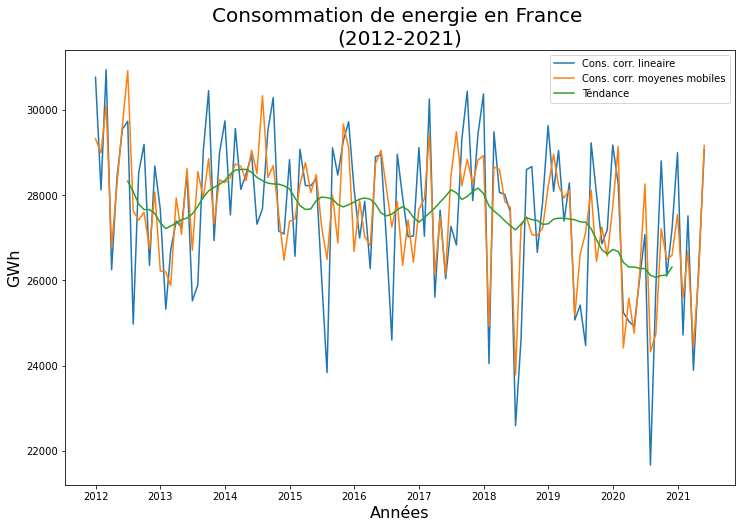

In [65]:
plt.figure(figsize=(12,8))

plt.subplot()
plt.plot(energie.index, energie['cons_RL'], label='Cons. corr. lineaire')
plt.plot(energie.index, energie['cons_ma'], label='Cons. corr. moyenes mobiles')
plt.plot(energie.index, energie_ma['trend'], label='Téndance')

plt.title('Consommation de energie en France \n(2012-2021)', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper right')

plt.savefig('P9_corr_ma_ten.png');

# Mission 3

## Méthode de Holt Winters

In [66]:
hw = ExponentialSmoothing(np.asarray(energie['cons_RL']), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)

In [67]:
hw.summary()

Dep. Variable:,endog,No. Observations:,114
Model:,ExponentialSmoothing,SSE,250530817.846
Optimized:,True,AIC,1696.730
Trend:,Additive,BIC,1740.509
Seasonal:,Additive,AICC,1703.930
Seasonal Periods:,12,Date:,"Tue, 01 Mar 2022"
Box-Cox:,False,Time:,23:49:56
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0756840,alpha,True
smoothing_trend,0.0540686,beta,True


In [68]:
idx_pred = pd.date_range(start='7/1/2021', periods=12, freq='MS')

In [69]:
energie['fit_values'] = hw.fittedvalues
energie.head()

,cons,DJU_ch,DJU_ac,DJU_total,cons_RL,cons_ma,fit_values
t,,,,,,,
2012-01-01,51086.0,336.0,0.0,336.0,30772.305128,29324.683198,30761.277059
2012-02-01,54476.0,435.9,0.0,435.9,28122.608349,28998.076087,28103.719901
2012-03-01,43156.0,201.9,0.0,201.9,30949.645849,30118.319112,30922.038873
2012-04-01,40176.0,230.3,0.0,230.3,26252.654973,26795.032770,26222.933789
2012-05-01,35257.0,83.3,30.1,113.4,28401.127981,28239.604378,28362.938715


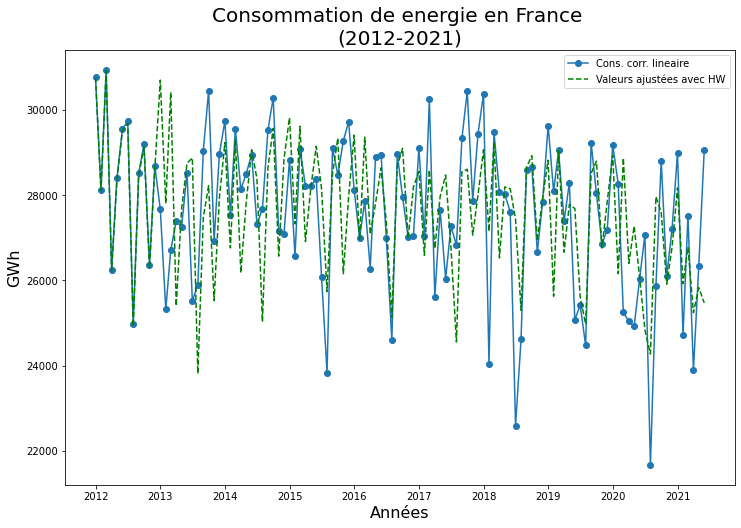

In [70]:
plt.figure(figsize=(12,8))

plt.subplot()
plt.plot(energie.index, energie['cons_RL'], marker='o', label='Cons. corr. lineaire')
plt.plot(energie.index, energie['fit_values'], linestyle='--', color='green', label='Valeurs ajustées avec HW')

plt.title('Consommation de energie en France \n(2012-2021)', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper right')

plt.savefig('P9_fitHW.png');

In [71]:
hw_std = hw.resid.std()
hw_std

1481.827295361616

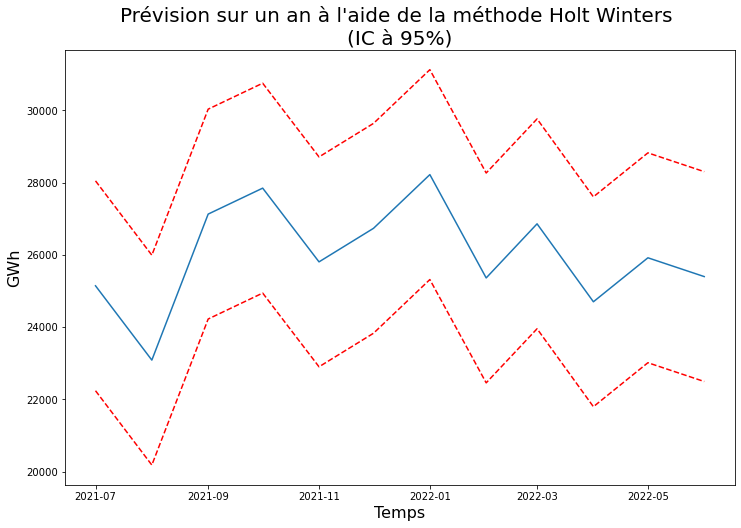

In [72]:
plt.figure(figsize=(12,8))
plt.plot(idx_pred, hw_pred, label='Prévision HW')
plt.plot(idx_pred, hw_pred+(1.96*hw_std), linestyle='--', color='r', label='Upper')
plt.plot(idx_pred, hw_pred-(1.96*hw_std), linestyle='--', color='r', label='Lower')
plt.title('Prévision sur un an à l\'aide de la méthode Holt Winters \n(IC à 95%)', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.xlabel('Temps', fontsize=16)

plt.savefig('P9_predHW.png')
plt.show()

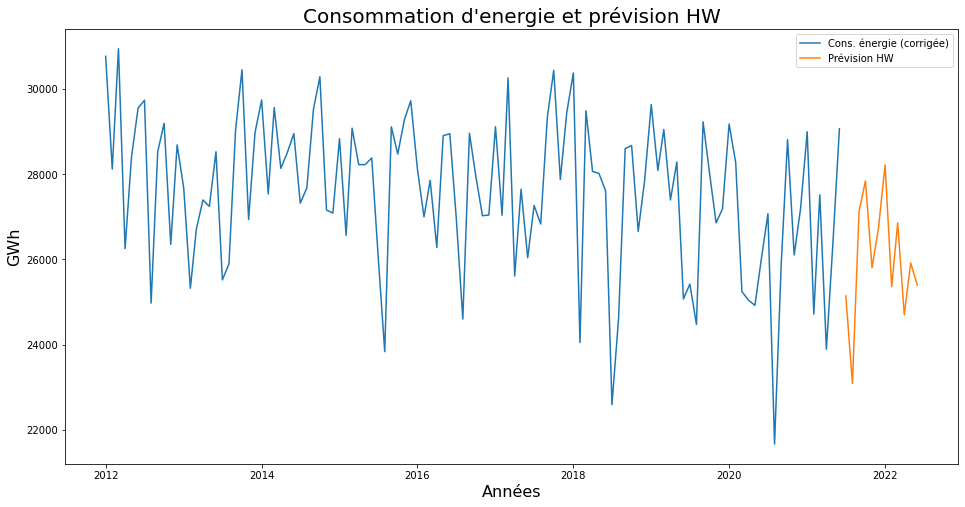

In [73]:
plt.figure(figsize=(16,8))
plt.plot(energie.index, energie['cons_RL'], label='Cons. énergie (corrigée)')
plt.plot(idx_pred, hw_pred, label='Prévision HW')
plt.legend()
plt.title('Consommation d\'energie et prévision HW', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.savefig('P9_consHW12.png')
plt.show()

## Méthode SARIMA

In [74]:
ts_len = len(energie)

In [75]:
acf1 = acf(np.asarray(energie['cons_RL']))
pacf1 = pacf(np.asarray(energie['cons_RL']))

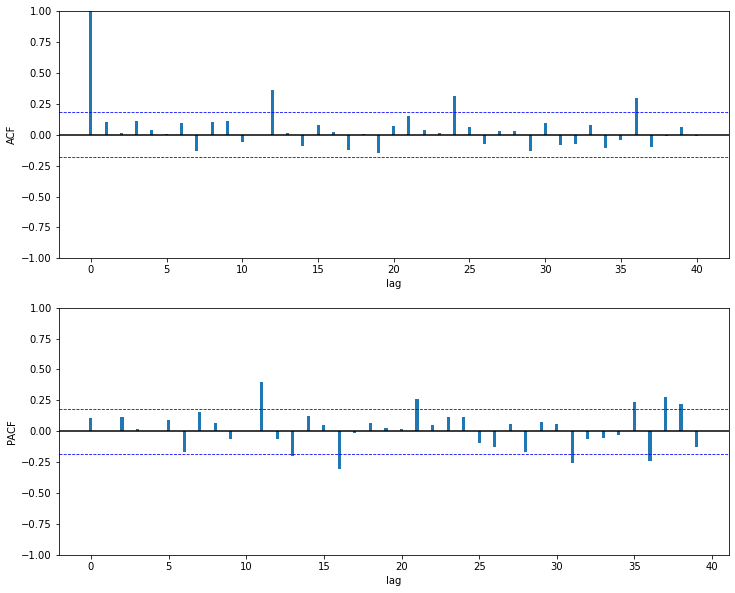

In [76]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf1)), acf1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(ts_len), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(ts_len), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf1[1:])), pacf1[1:], width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(ts_len), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(ts_len), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P9_acf1.png')
plt.show()

La sortie ACF de la série présente une décroissance lente vers 0 pour les multiples de 12. On effectue la différenciation  $\left( 𝐼−𝐵^{12} \right)$.

In [77]:
e_dif12 = energie['cons_RL'] - energie['cons_RL'].shift(12)
e_dif12

t
2012-01-01            NaN
2012-02-01            NaN
2012-03-01            NaN
2012-04-01            NaN
2012-05-01            NaN
                 ...     
2021-02-01   -3550.335021
2021-03-01    2269.810694
2021-04-01   -1151.347057
2021-05-01    1416.540422
2021-06-01    3028.311074
Name: cons_RL, Length: 114, dtype: float64

In [78]:
acf12 = acf(e_dif12[13:])
pacf12 = pacf(e_dif12[13:])

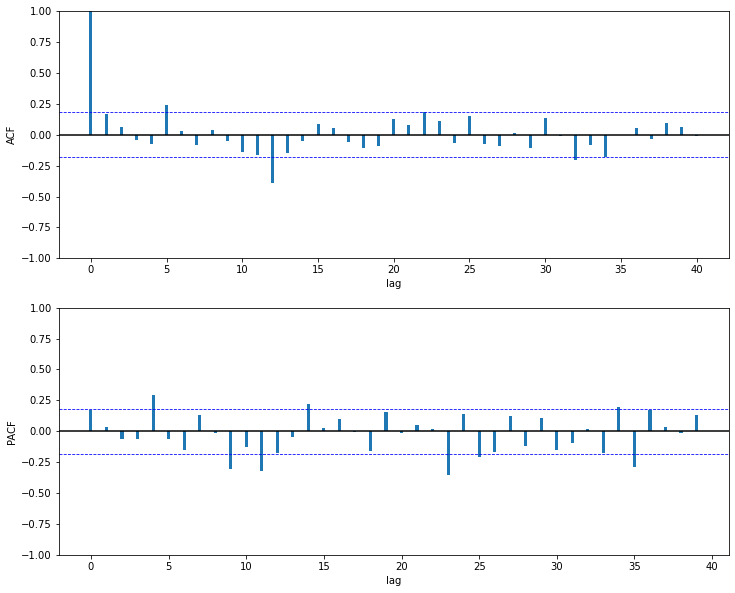

In [79]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf12)), acf12, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(ts_len), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(ts_len), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf12[1:])), pacf12[1:], width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(ts_len), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(ts_len), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P9_acf12.png')
plt.show()

In [80]:
model1 = SARIMAX(np.asarray(energie['cons_RL']), order=(1,1,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
print(results1.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -905.196
Date:                            Tue, 01 Mar 2022   AIC                           1820.391
Time:                                    23:50:06   BIC                           1833.467
Sample:                                         0   HQIC                          1825.685
                                            - 114                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3970      0.204      1.945      0.052      -0.003       0.797
ma.L1         -0.6108      0.187   

In [81]:
model2 = SARIMAX(np.asarray(energie['cons_RL']), order=(0,1,1), seasonal_order=(1,1,1,12))
results2 = model2.fit()
print(results2.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -905.930
Date:                            Tue, 01 Mar 2022   AIC                           1819.860
Time:                                    23:50:08   BIC                           1830.321
Sample:                                         0   HQIC                          1824.095
                                            - 114                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2152      0.043     -4.967      0.000      -0.300      -0.130
ar.S.L12       0.3630      0.068   

In [82]:
from scipy.stats import shapiro

shapiro(results2.resid)

ShapiroResult(statistic=0.5825099945068359, pvalue=1.748481408622585e-16)

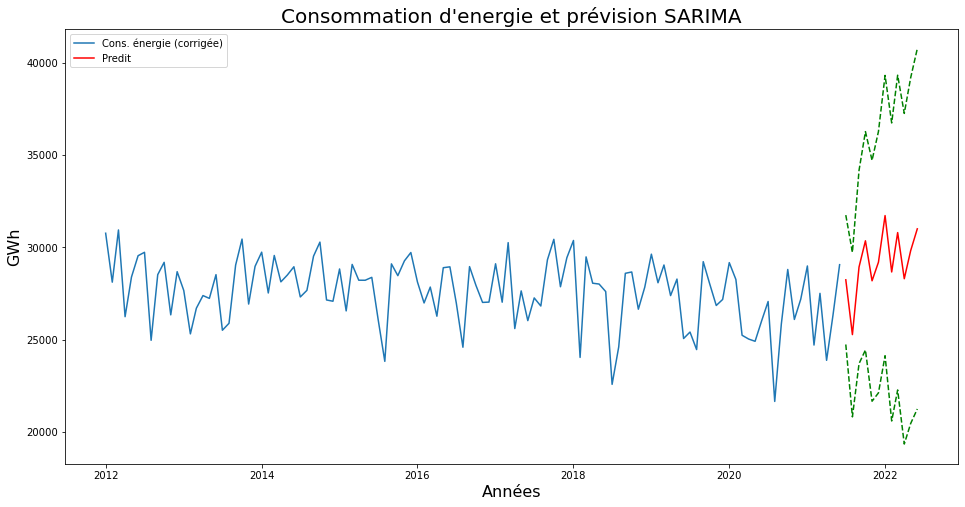

In [83]:
pred_model2 = results2.get_forecast(12)
pred = pred_model2.predicted_mean
pred_l = [elt[0] for elt in pred_model2.conf_int(alpha=0.05)]
pred_u = [elt[1] for elt in pred_model2.conf_int(alpha=0.05)]

plt.figure(figsize=(16,8))
plt.plot(energie['cons_RL'], label='Cons. énergie (corrigée)')
plt.plot(pd.date_range(energie.index[len(energie)-1], periods=12, freq='M'), pred, color='r', label='Predit')
plt.plot(pd.date_range(energie.index[len(energie)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(energie.index[len(energie)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()

plt.title('Consommation d\'energie et prévision SARIMA', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.savefig('P9_sarima12')
plt.show()

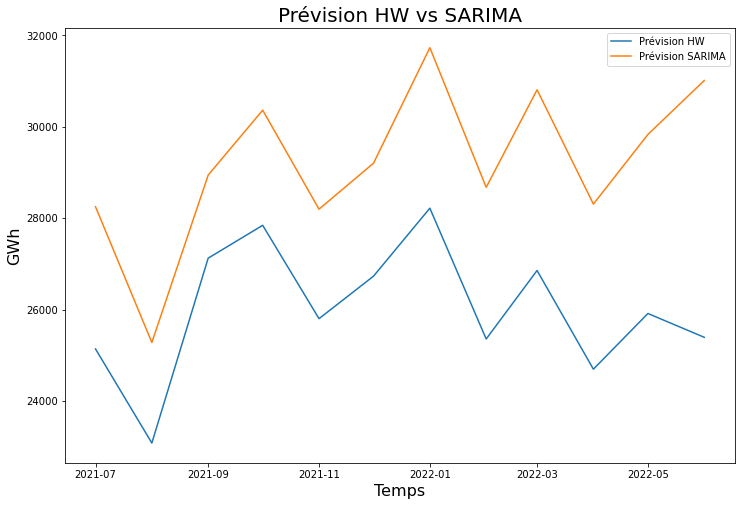

In [84]:
plt.figure(figsize=(12,8))
plt.plot(idx_pred, hw_pred, label='Prévision HW')
plt.plot(idx_pred, pred, label='Prévision SARIMA')
plt.legend()

plt.title('Prévision HW vs SARIMA', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.xlabel('Temps', fontsize=16)
plt.savefig('P9_pred_comp.png')
plt.show()

### Analyse a posteriori

In [85]:
x_tronc = energie['cons_RL'][:'12/01/2019']
x_a_prevoir = energie['cons_RL']['01/01/2020':]

In [86]:
model2tron = SARIMAX(np.asarray(x_tronc), order=(0,1,1), seasonal_order=(1,1,1,12))
results2tron = model2tron.fit()
print(results2.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2tron.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -905.930
Date:                            Tue, 01 Mar 2022   AIC                           1819.860
Time:                                    23:50:13   BIC                           1830.321
Sample:                                         0   HQIC                          1824.095
                                            - 114                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2152      0.043     -4.967      0.000      -0.300      -0.130
ar.S.L12       0.3630      0.068   

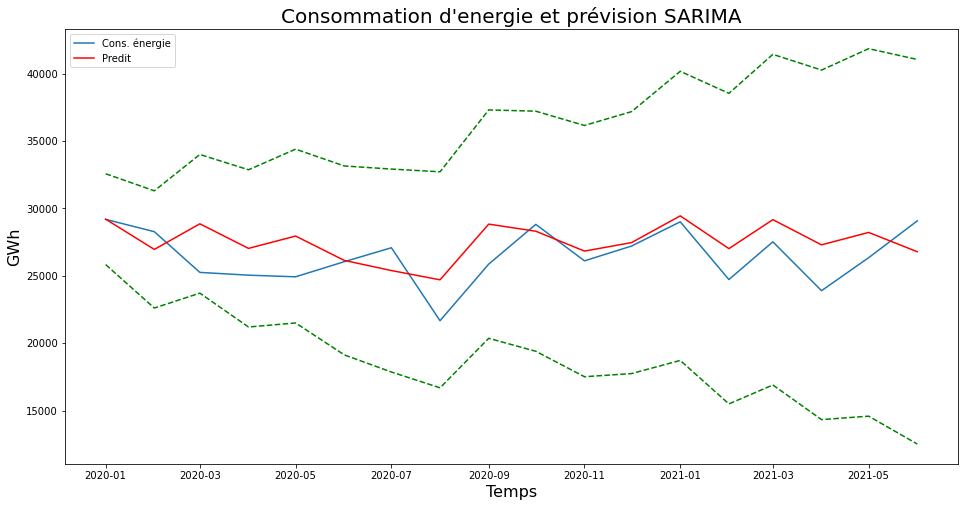

In [87]:
pred_model2tronc = results2tron.get_forecast(18)
pred_tronc = pred_model2tronc.predicted_mean
pred_l_tronc = [elt[0] for elt in pred_model2tronc.conf_int(alpha=0.05)]
pred_u_tronc = [elt[1] for elt in pred_model2tronc.conf_int(alpha=0.05)]

plt.figure(figsize=(16,8))
plt.plot(x_a_prevoir, label='Cons. énergie')
plt.plot(x_a_prevoir.index, pred_tronc, color='r', label='Predit')
plt.plot(x_a_prevoir.index, pred_l_tronc, color='g', linestyle='--')
plt.plot(x_a_prevoir.index, pred_u_tronc, color='g', linestyle='--')
plt.legend()

plt.title('Consommation d\'energie et prévision SARIMA', fontsize=20)
plt.ylabel('GWh', fontsize=16)
plt.xlabel('Temps', fontsize=16)

plt.show()


In [88]:
mape=(np.abs(1-pred_tronc/x_a_prevoir)).mean()*100
mape

6.811251857008048